In [1]:
import numpy as  np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from Essential_Functions import Spacing,CalculateSpacing,ConnectDatabase,GetRandomPlayerID,GetTankCategories,ConvertVPPString,CreateVPPDictionary,CalculatePercentage

In [2]:
cr,db = ConnectDatabase("WoTData.db")

Connected to WoTData.db Successfully.



In [7]:
# Get the player ID
PlayerID = GetRandomPlayerID(cr,db)
#PlayerID = 
print(PlayerID)

# Get the vehicle personality preference string from the given player and convert it into a dictionary
cr.execute("""SELECT vehicle_personality_preference FROM PlayerStatistics WHERE account_id = """ + str(PlayerID))
VPPString = cr.fetchone()[0]
VPPDictionary = ConvertVPPString(cr,db,VPPString)

11375


In [8]:
# For tiers, nations and types, create two lists where the first represents the labels of the categories 
# whilst the second represents the player's artificial ratings of the categories
TierList = []
PlayerTierList = []
for Tier in VPPDictionary["tiers"]:
    TierList.append(Tier)
    PlayerTierList.append(round(VPPDictionary["tiers"][Tier] * 100, 2))

NationList = []
PlayerNationList = []
for Nation in VPPDictionary["nations"]:
    NationList.append(Nation)
    PlayerNationList.append(round(VPPDictionary["nations"][Nation] * 100, 2))

TypeList = []
PlayerTypeList = []
for Type in VPPDictionary["types"]:
    TypeList.append(Type)
    PlayerTypeList.append(round(VPPDictionary["types"][Type] * 100, 2))

    
print(TierList)
print(PlayerTierList)
print(NationList)
print(PlayerNationList)
print(TypeList)
print(PlayerTypeList)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[2.66, 7.69, 28.99, 56.51, 98.82, 100.0, 53.25, 56.8, 0.0, 0.0]
['china', 'czech', 'france', 'germany', 'italy', 'japan', 'poland', 'sweden', 'uk', 'usa', 'ussr']
[2.29, 0.0, 11.34, 16.25, 0.0, 0.0, 0.0, 0.0, 0.0, 100.0, 19.3]
['AT-SPG', 'SPG', 'heavyTank', 'lightTank', 'mediumTank']
[100.0, 0.0, 3.87, 18.23, 3.87]


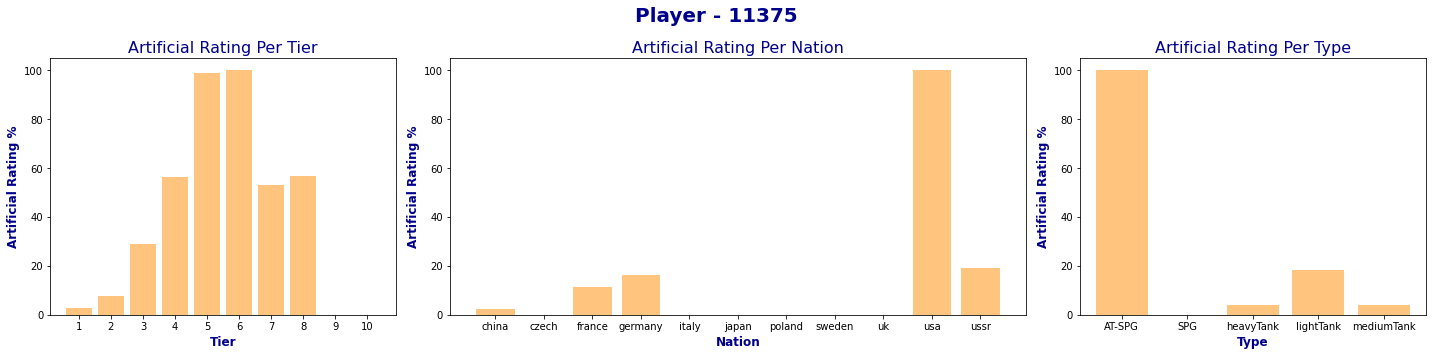

In [9]:
# Create one large figure which contains a visual demonstration of the given player's vehicle personality preference
# Each is displayed as a bar chart alongside each other

Figure, (TierPlot, NationPlot, TypePlot) = plt.subplots(1,3, gridspec_kw={'width_ratios': [1.5, 2.5, 1.5]})
Figure.set_size_inches(20, 5)
Figure.suptitle("Player - " + str(PlayerID), color = "darkblue", size = 20, fontweight = "bold")

TierPlot.bar(TierList, PlayerTierList, color = "darkorange", alpha = 0.5)
TierPlot.set_title("Artificial Rating Per Tier", color = "darkblue", size = 16)
TierPlot.set_xlabel("Tier", color = "darkblue", size = 12, fontweight = "bold")
TierPlot.set_xticks(TierList)
TierPlot.set_ylabel("Artificial Rating %", color = "darkblue", size = 12, fontweight = "bold")
    
NationPlot.bar(NationList, PlayerNationList, color = "darkorange", alpha = 0.5)
NationPlot.set_title("Artificial Rating Per Nation", color = "darkblue", size = 16)
NationPlot.set_xlabel("Nation", color = "darkblue", size = 12, fontweight = "bold")
NationPlot.set_xticks(NationList)
NationPlot.set_ylabel("Artificial Rating %", color = "darkblue", size = 12, fontweight = "bold")

TypePlot.bar(TypeList, PlayerTypeList, color = "darkorange", alpha = 0.5)
TypePlot.set_title("Artificial Rating Per Type", color = "darkblue", size = 16)
TypePlot.set_xlabel("Type", color = "darkblue", size = 12, fontweight = "bold")
TypePlot.set_xticks(TypeList)
TypePlot.set_ylabel("Artificial Rating %", color = "darkblue", size = 12, fontweight = "bold")

plt.tight_layout()
plt.show()
# Save the plot as a png image file
Figure.savefig("Visualisations/VPP - " + str(PlayerID) + ".png", dpi=100)

In [10]:
# Function to output the list of tanks a given player has played with their basic statistics
def OutputPlayerOverview(cr,db,PlayerID):
    # Get the statistics and tanks of the target player
    print("Getting " + str(PlayerID) + " Statistics and Tanks...")
    Spacing(1)
    cr.execute("""SELECT statistics$all$battles, statistics$all$wins, vehicle_personality_preference FROM PlayerStatistics WHERE account_id = """ + str(PlayerID))
    PlayerStatistic = cr.fetchone()
    cr.execute("""SELECT tank_id,wins,battles,artificial_rating FROM PlayerTanks WHERE account_id = """ + str(PlayerID))
    PlayerTanks = cr.fetchall()

    # Output basic statistics of the target player
    print("   ---   PlayerStatistics for Player: " + str(PlayerID) + "   ---")
    Spacing(1)
    print("Overall Battles: " + str(PlayerStatistic[0]))
    print("Overall Wins:    " + str(PlayerStatistic[1]))
    print("Overall Winrate: " + CalculatePercentage([PlayerStatistic[1], PlayerStatistic[0]], 2))
    Spacing(2)
                                    

    # Output the list of vehicles owned by the target player and their statistics
    print("   ---   PlayerTanks for Player: " + str(PlayerID) + "   ---")
    Spacing(1)

    # Values are outputted in a table style, SpacingValues represents the number of spaces between each column
    SpacingValues = [18, 8, 12, 15, 8, 10, 11, 20]
    Titles = ["Tank Name:", "Tier:", "Nation:", "Type:", "Wins:", "Battles:", "Winrate:", "Artificial Rating:"]
    TableTitle = ""

    # Output the column titles of the table
    for Position in range(len(SpacingValues)):
        TableTitle += CalculateSpacing(Titles[Position], SpacingValues[Position])
    print(TableTitle)

    # Loop through each of the target player's tanks
    for PlayerTank in PlayerTanks:

        # Get the statistics of the tank itself
        cr.execute("""SELECT short_name,tier,nation,type FROM GameTanks WHERE tank_id = """ + str(PlayerTank[0]))
        TankCategories = cr.fetchone()

        # Create a string to represent the row of data and output it
        CurrentTankString = ""
        TankDetails = [TankCategories[0], TankCategories[1], TankCategories[2], TankCategories[3], PlayerTank[1], PlayerTank[2], CalculatePercentage([PlayerTank[1], PlayerTank[2]], 2), CalculatePercentage(PlayerTank[3], 2)]
        for Position in range(len(SpacingValues)):
            CurrentTankString += CalculateSpacing(TankDetails[Position], SpacingValues[Position])
        print(CurrentTankString)
        
OutputPlayerOverview(cr,db,PlayerID)

Getting 11375 Statistics and Tanks...

   ---   PlayerStatistics for Player: 11375   ---

Overall Battles: 2758
Overall Wins:    1368
Overall Winrate: 49.6%


   ---   PlayerTanks for Player: 11375   ---

Tank Name:        Tier:   Nation:     Type:          Wins:   Battles:  Winrate:   Artificial Rating:  
Jackson           6       usa         AT-SPG         213     433       49.19%     100.0%              
T28               8       usa         AT-SPG         171     384       44.53%     80.19%              
T25 AT            7       usa         AT-SPG         169     367       46.05%     79.25%              
Wolverine         5       usa         AT-SPG         105     217       48.39%     49.06%              
Leopard           5       germany     lightTank      123     212       58.02%     57.55%              
SU-85             5       ussr        AT-SPG         103     196       52.55%     48.11%              
Hellcat           6       usa         AT-SPG         106     187       56.